Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical

Load and Clean Data

In [2]:
df = pd.read_csv('LoanApprovalPrediction.csv')
df = df.drop_duplicates()
df.shape
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# copy
df_clean = df.copy()

# drop Loan_ID column
df_clean = df_clean.drop('Loan_ID', axis=1)

# convert NaN to 0 in 'Dependents' column
df_clean['Dependents'] = df_clean['Dependents'].fillna(0)

# convert NaN to 0 in 'LoanAmount' column
df_clean['LoanAmount'] = df_clean['LoanAmount'].fillna(0)

# convert NaN to 0 in 'Loan_Amount_Term' column
df_clean['Loan_Amount_Term'] = df_clean['Loan_Amount_Term'].fillna(0)

# convert NaN to 0 in 'Credit_History' column
df_clean['Credit_History'] = df_clean['Credit_History'].fillna(0)

# check for missing values
# df_clean.isnull().sum()
df_clean['Loan_Status'].value_counts()

Y    409
N    186
Name: Loan_Status, dtype: int64

In [4]:
## OHE

# initialize OneHotEncoder
ohe = OneHotEncoder()

# get list of categorical columns (not target column)
ohe_columns = [col for col in df_clean.columns if df_clean[col].dtype == 'object' and col != 'Loan_Status']

# run get_dummies on categorical columns
df_clean = pd.get_dummies(df_clean, columns=ohe_columns)

Split Data and Standardize Non-OHE columns

In [14]:
# split into input features, output label
X = df_clean.drop('Loan_Status', axis=1)
y = df_clean['Loan_Status']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Modeling

              precision    recall  f1-score   support

           N       0.72      0.47      0.57        38
           Y       0.79      0.91      0.85        81

    accuracy                           0.77       119
   macro avg       0.75      0.69      0.71       119
weighted avg       0.77      0.77      0.76       119



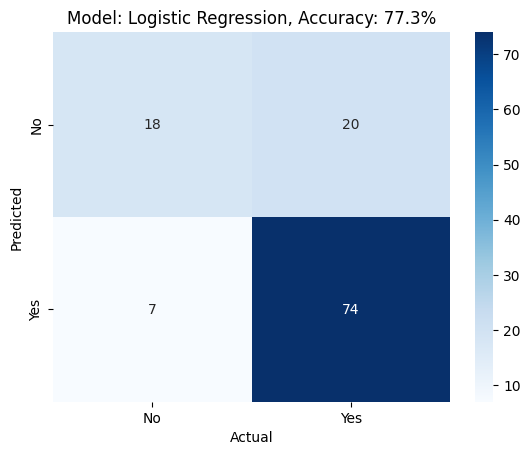

In [6]:
# LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

# Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred_LR))
cm_LR = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm_LR, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model: Logistic Regression, Accuracy: {0:.1f}%'.format(100*model_LR.score(X_test, y_test)))
plt.show()

              precision    recall  f1-score   support

           N       0.51      0.53      0.52        38
           Y       0.78      0.77      0.77        81

    accuracy                           0.69       119
   macro avg       0.64      0.65      0.64       119
weighted avg       0.69      0.69      0.69       119



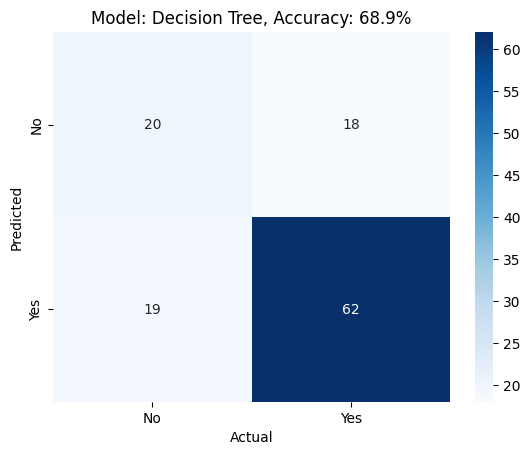

In [7]:
# DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)

# Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred_DT))
cm_DT = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model: Decision Tree, Accuracy: {0:.1f}%'.format(100*model_DT.score(X_test, y_test)))
plt.show()

              precision    recall  f1-score   support

           N       0.65      0.29      0.40        38
           Y       0.74      0.93      0.82        81

    accuracy                           0.72       119
   macro avg       0.69      0.61      0.61       119
weighted avg       0.71      0.72      0.69       119



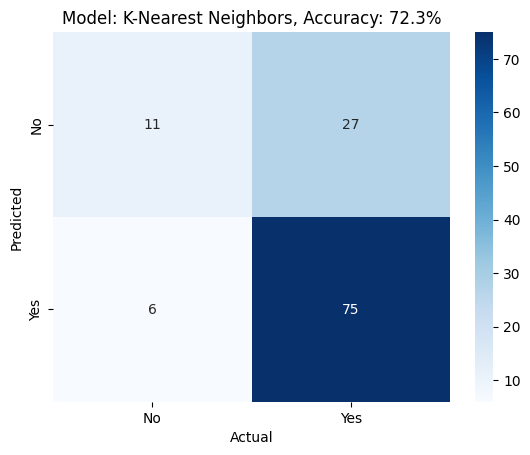

In [8]:
# KNN
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
y_pred_KNN = model_KNN.predict(X_test)

# Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred_KNN))
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
sns.heatmap(cm_KNN, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model: K-Nearest Neighbors, Accuracy: {0:.1f}%'.format(100*model_KNN.score(X_test, y_test)))
plt.show()

              precision    recall  f1-score   support

           N       0.71      0.45      0.55        38
           Y       0.78      0.91      0.84        81

    accuracy                           0.76       119
   macro avg       0.74      0.68      0.69       119
weighted avg       0.76      0.76      0.75       119



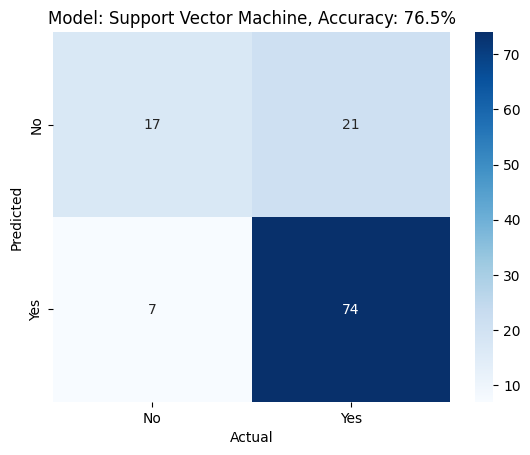

In [9]:
# SVM
model_SVM = SVC()
model_SVM.fit(X_train, y_train)
y_pred_SVM = model_SVM.predict(X_test)

# Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred_SVM))
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
sns.heatmap(cm_SVM, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model: Support Vector Machine, Accuracy: {0:.1f}%'.format(100*model_SVM.score(X_test, y_test)))
plt.show()

              precision    recall  f1-score   support

           N       0.58      0.50      0.54        38
           Y       0.78      0.83      0.80        81

    accuracy                           0.72       119
   macro avg       0.68      0.66      0.67       119
weighted avg       0.71      0.72      0.72       119



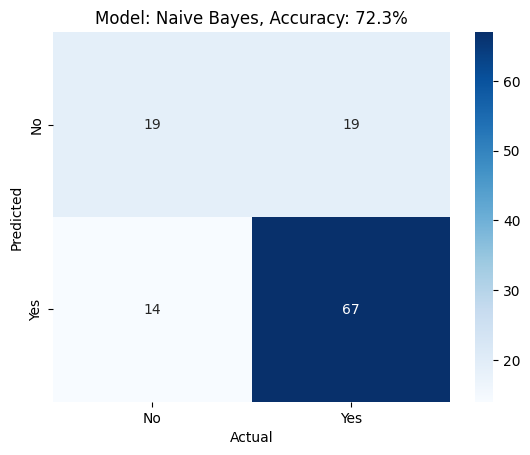

In [10]:
# Naive Bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
y_pred_NB = model_NB.predict(X_test)

# Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred_NB))
cm_NB = confusion_matrix(y_test, y_pred_NB)
sns.heatmap(cm_NB, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model: Naive Bayes, Accuracy: {0:.1f}%'.format(100*model_NB.score(X_test, y_test)))
plt.show()

In [15]:
# Neural Network
input_neurons = X_train.shape[1] # make dynamic

# convert y_train and y_test to 0 and 1
y_train_nn = y_train.map({'N': 0, 'Y': 1})
y_test_nn = y_test.map({'N': 0, 'Y': 1})

In [17]:
model_NN = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_NN.fit(X_train, y_train_nn, epochs=20, validation_data=(X_test, y_test_nn))

Epoch 1/20
15/15 [==============================] - 1s 19ms/step - loss: 0.6430 - accuracy: 0.6660 - val_loss: 0.6231 - val_accuracy: 0.7143
Epoch 2/20
15/15 [==============================] - 0s 6ms/step - loss: 0.5800 - accuracy: 0.7017 - val_loss: 0.6072 - val_accuracy: 0.6891
Epoch 3/20
15/15 [==============================] - 0s 6ms/step - loss: 0.5467 - accuracy: 0.7227 - val_loss: 0.5933 - val_accuracy: 0.7311
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.5237 - accuracy: 0.7626 - val_loss: 0.5806 - val_accuracy: 0.7227
Epoch 5/20
15/15 [==============================] - 0s 6ms/step - loss: 0.5102 - accuracy: 0.7563 - val_loss: 0.5791 - val_accuracy: 0.7311
Epoch 6/20
15/15 [==============================] - 0s 6ms/step - loss: 0.4993 - accuracy: 0.7731 - val_loss: 0.5755 - val_accuracy: 0.7395
Epoch 7/20
15/15 [==============================] - 0s 6ms/step - loss: 0.4929 - accuracy: 0.7752 - val_loss: 0.5777 - val_accuracy: 0.7395
Epoch 8/20
15/15 [=

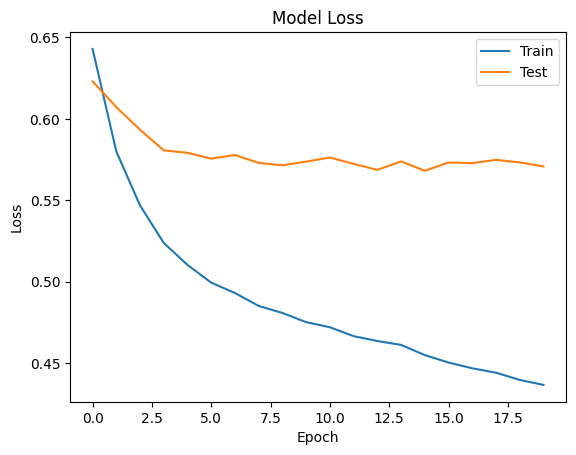

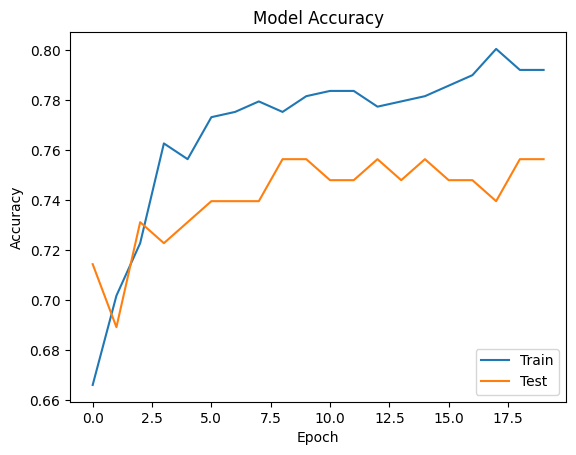

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.46      0.57        41
           1       0.76      0.91      0.83        78

    accuracy                           0.76       119
   macro avg       0.75      0.69      0.70       119
weighted avg       0.75      0.76      0.74       119

4/4 [==============================] - 0s 3ms/step - loss: 0.5707 - accuracy: 0.7563


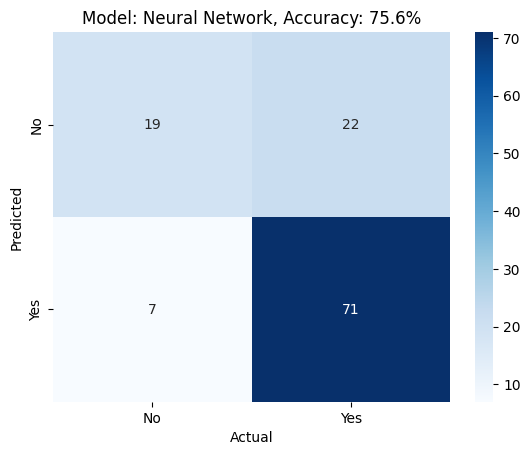

In [19]:
# plot loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# predict
y_pred_NN = model_NN.predict(X_test)
y_pred_NN = np.round(y_pred_NN).flatten()

# Classification Report and Confusion Matrix
print(classification_report(y_test_nn, y_pred_NN))
cm_NN = confusion_matrix(y_test_nn, y_pred_NN)
sns.heatmap(cm_NN, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model: Neural Network, Accuracy: {0:.1f}%'.format(100*model_NN.evaluate(X_test, y_test_nn)[1]))
plt.show()

              precision    recall  f1-score   support

           N       0.28      0.17      0.21        41
           Y       0.64      0.77      0.70        78

    accuracy                           0.56       119
   macro avg       0.46      0.47      0.45       119
weighted avg       0.51      0.56      0.53       119



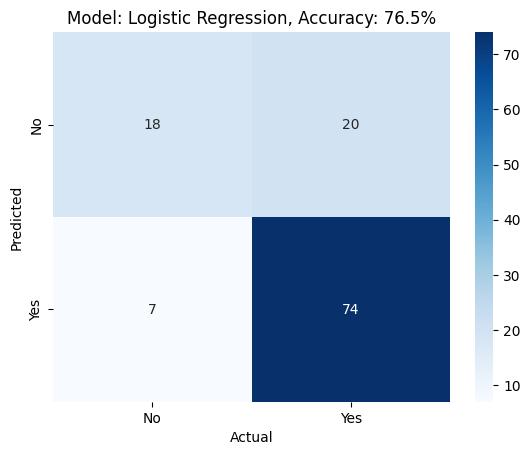

In [32]:
# Make a function such that the model chosen is dynamic

def model_type(model):
    if model == 'Logistic Regression':
        model = model_LR
        y_pred = y_pred_LR
        cm = cm_LR
        model_choice = 'Logistic Regression'
    elif model == 'Decision Tree':
        model = model_DT
        y_pred = y_pred_DT
        cm = cm_DT
        model_choice = 'Decision Tree'
    elif model == 'K-Nearest Neighbors':
        model = model_KNN
        y_pred = y_pred_KNN
        cm = cm_KNN
        model_choice = 'K-Nearest Neighbors'
    elif model == 'Support Vector Machine':
        model = model_SVM
        y_pred = y_pred_SVM
        cm = cm_SVM
        model_choice = 'Support Vector Machine'
    elif model == 'Naive Bayes':
        model = model_NB
        y_pred = y_pred_NB
        cm = cm_NB
        model_choice = 'Naive Bayes'
    elif model == 'Neural Network':
        model = model_NN
        y_pred = y_pred_NN
        cm = cm_NN
        model_choice = 'Neural Network'
        
    else:
        print('Invalid model')
        return

    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Model: {0}, Accuracy: {1:.1f}%'.format(model_choice, 100*model.score(X_test, y_test)))
    plt.show()

model_type('Logistic Regression')